In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
#n_units=512
n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_10degree = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_10degree = x_10degree.to_numpy(dtype='float32')

In [7]:
x = x_10degree[:, 0:15]

In [8]:
x = x.reshape(((72+1)*6, n_sensors, 1))

In [9]:
y_10degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_10degree = y_10degree.to_numpy(dtype='float32')

In [12]:
y = y_10degree.reshape((((72*1+1)*6, 100, 100)))

In [13]:
tsr = x_10degree[:, -2]

In [14]:
theta = x_10degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
#x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fifthHiddenLayerSensor')(x_)
'''x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='sixthHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='seventhHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='eighthHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='ninthHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='tenthHiddenLayerSensor')(x_)'''
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 1024)             3072      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 1024)             1049600   
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 1024)             1049600   
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test.reshape((-1,1)))).reshape((44, 2, 1))

In [27]:
tsr_theta_train.shape

(394, 2, 1)

In [28]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 4ms/step - loss: 3.6693 - rmse: 1.9155
Epoch 2/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.4391 - rmse: 0.6626
Epoch 3/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.1443 - rmse: 0.3799
Epoch 4/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0457 - rmse: 0.2138
Epoch 5/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0306 - rmse: 0.1749
Epoch 6/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0241 - rmse: 0.1551
Epoch 7/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0235 - rmse: 0.1533
Epoch 8/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1473
Epoch 9/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0237 - rmse: 0.1541
Epoch 10/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0227 - rmse: 0.1507
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 4ms/step - loss: 0.0275 - rmse: 0.1658
Epoch 85/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0271 - rmse: 0.1647
Epoch 86/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0274 - rmse: 0.1655
Epoch 87/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0288 - rmse: 0.1698
Epoch 88/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0310 - rmse: 0.1761
Epoch 89/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0281 - rmse: 0.1676
Epoch 90/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0240 - rmse: 0.1550
Epoch 91/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1680
Epoch 92/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0285 - rmse: 0.1689
Epoch 93/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0270 - rmse: 0.1643
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 4ms/step - loss: 0.0242 - rmse: 0.1555
Epoch 168/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0266 - rmse: 0.1631
Epoch 169/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0225 - rmse: 0.1501
Epoch 170/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0229 - rmse: 0.1514
Epoch 171/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0242 - rmse: 0.1556
Epoch 172/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0230 - rmse: 0.1516
Epoch 173/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0229 - rmse: 0.1513
Epoch 174/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0235 - rmse: 0.1532
Epoch 175/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0231 - rmse: 0.1521
Epoch 176/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1502
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0258 - rmse: 0.1606
Epoch 250/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1562
Epoch 251/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1561
Epoch 252/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0240 - rmse: 0.1549
Epoch 253/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1463
Epoch 254/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1449
Epoch 255/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 256/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1448
Epoch 257/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0222 - rmse: 0.1491
Epoch 258/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0211 - rmse: 0.1452
Epoch 332/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1465
Epoch 333/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.1427
Epoch 334/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0212 - rmse: 0.1457
Epoch 335/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1504
Epoch 336/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1451
Epoch 337/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 338/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0207 - rmse: 0.1437
Epoch 339/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0208 - rmse: 0.1444
Epoch 340/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1465
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.1425
Epoch 414/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 415/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 416/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 417/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 418/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 419/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0207 - rmse: 0.1438
Epoch 420/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1459
Epoch 421/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0220 - rmse: 0.1482
Epoch 422/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1463
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 496/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 497/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 498/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 499/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 500/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 501/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 502/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 503/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1401
Epoch 504/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1373
Epoch 578/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 579/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 580/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1373
Epoch 581/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 582/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 583/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 584/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 585/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 586/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 660/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 661/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 662/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 663/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 664/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 665/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 666/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 667/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 668/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 742/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 743/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 744/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 745/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1340
Epoch 746/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 747/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 748/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 749/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 750/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 824/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1324
Epoch 825/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 826/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 827/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1324
Epoch 828/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 829/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 830/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 831/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1317
Epoch 832/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 833/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 906/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 907/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 908/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 909/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 910/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1324
Epoch 911/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 912/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 913/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 914/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1317
Epoch 915/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 988/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 989/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 990/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 991/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 992/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 993/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 994/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 995/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 996/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 997/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 1070/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 1071/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 1072/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 1073/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 1074/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 1075/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 1076/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 1077/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 1078/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 1079/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 1152/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 1153/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 1154/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 1155/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 1156/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 1157/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 1158/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1330
Epoch 1159/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1321
Epoch 1160/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 1161/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 1234/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 1235/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 1236/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 1237/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 1238/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 1239/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 1240/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 1241/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 1242/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 1243/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 1316/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 1317/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1267
Epoch 1318/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1267
Epoch 1319/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 1320/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 1321/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 1322/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 1323/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 1324/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 1325/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 1398/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 1399/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 1400/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 1401/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 1402/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 1403/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 1404/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 1405/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 1406/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 1407/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 1480/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 1481/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 1482/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 1483/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 1484/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1251
Epoch 1485/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 1486/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1243
Epoch 1487/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 1488/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 1489/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1226
Epoch 1562/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1226
Epoch 1563/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1225
Epoch 1564/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1244
Epoch 1565/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1236
Epoch 1566/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 1567/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 1568/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1251
Epoch 1569/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 1570/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1227
Epoch 1571/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1227
Epoch 1644/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1202
Epoch 1645/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1220
Epoch 1646/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1210
Epoch 1647/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1228
Epoch 1648/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1223
Epoch 1649/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1204
Epoch 1650/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1206
Epoch 1651/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1198
Epoch 1652/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1183
Epoch 1653/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1160
Epoch 1726/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1156
Epoch 1727/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1138
Epoch 1728/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1163
Epoch 1729/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1161
Epoch 1730/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1178
Epoch 1731/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1158
Epoch 1732/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1157
Epoch 1733/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1178
Epoch 1734/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1230
Epoch 1735/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1194
Epoch 1808/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1193
Epoch 1809/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 1810/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1124
Epoch 1811/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1202
Epoch 1812/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1155
Epoch 1813/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1119
Epoch 1814/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1107
Epoch 1815/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1101
Epoch 1816/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 1817/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 1890/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1171
Epoch 1891/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 1892/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1128
Epoch 1893/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1124
Epoch 1894/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1086
Epoch 1895/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1123
Epoch 1896/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1071
Epoch 1897/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1064
Epoch 1898/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1100
Epoch 1899/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1111
Epoch 1972/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1134
Epoch 1973/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1090
Epoch 1974/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 1975/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1053
Epoch 1976/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1087
Epoch 1977/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1054
Epoch 1978/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1109
Epoch 1979/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1224
Epoch 1980/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1098
Epoch 1981/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1040
Epoch 2054/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1024
Epoch 2055/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1005
Epoch 2056/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1008
Epoch 2057/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1183
Epoch 2058/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 2059/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1120
Epoch 2060/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1060
Epoch 2061/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1011
Epoch 2062/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1005
Epoch 2063/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1097
Epoch 2136/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1014
Epoch 2137/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0966
Epoch 2138/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1051
Epoch 2139/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1086
Epoch 2140/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1057
Epoch 2141/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1058
Epoch 2142/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1130
Epoch 2143/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1136
Epoch 2144/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1056
Epoch 2145/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0951
Epoch 2218/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0989
Epoch 2219/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1009
Epoch 2220/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1020
Epoch 2221/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0972
Epoch 2222/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0992
Epoch 2223/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1062
Epoch 2224/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1028
Epoch 2225/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0992
Epoch 2226/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1026
Epoch 2227/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 2300/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0857
Epoch 2301/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0949
Epoch 2302/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1035
Epoch 2303/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 2304/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0889
Epoch 2305/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 2306/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0900
Epoch 2307/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 2308/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0903
Epoch 2309/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0893
Epoch 2382/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 2383/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 2384/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 2385/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1124
Epoch 2386/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0992
Epoch 2387/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1018
Epoch 2388/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1187
Epoch 2389/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1026
Epoch 2390/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 2391/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 2464/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 2465/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 2466/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1050
Epoch 2467/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0944
Epoch 2468/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0847
Epoch 2469/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0820
Epoch 2470/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 2471/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 2472/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0854
Epoch 2473/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 2546/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0814
Epoch 2547/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0797
Epoch 2548/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 2549/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 2550/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0990
Epoch 2551/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1010
Epoch 2552/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1043
Epoch 2553/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1321
Epoch 2554/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 2555/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1171
Epoch 2628/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 2629/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1107
Epoch 2630/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0991
Epoch 2631/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 2632/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0819
Epoch 2633/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 2634/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0839
Epoch 2635/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 2636/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 2637/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 2710/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 2711/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0887
Epoch 2712/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 2713/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0947
Epoch 2714/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1019
Epoch 2715/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 2716/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 2717/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1243
Epoch 2718/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 2719/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0839
Epoch 2792/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 2793/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 2794/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0863
Epoch 2795/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0844
Epoch 2796/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0908
Epoch 2797/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0797
Epoch 2798/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 2799/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 2800/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 2801/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 2874/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0764
Epoch 2875/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 2876/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 2877/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0966
Epoch 2878/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1237
Epoch 2879/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1003
Epoch 2880/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 2881/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 2882/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1040
Epoch 2883/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0801
Epoch 2956/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 2957/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 2958/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1234
Epoch 2959/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 2960/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 2961/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 2962/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 2963/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 2964/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 2965/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 3038/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 3039/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0765
Epoch 3040/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 3041/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 3042/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 3043/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0717
Epoch 3044/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 3045/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 3046/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 3047/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 3120/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 3121/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 3122/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0947
Epoch 3123/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 3124/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0628
Epoch 3125/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 3126/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1054
Epoch 3127/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0932
Epoch 3128/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1070
Epoch 3129/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 3202/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0636
Epoch 3203/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 3204/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 3205/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 3206/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 3207/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 3208/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 3209/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 3210/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 3211/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1080
Epoch 3284/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0889
Epoch 3285/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 3286/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 3287/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 3288/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0939
Epoch 3289/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1152
Epoch 3290/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 3291/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 3292/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 3293/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1222
Epoch 3366/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 3367/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1206
Epoch 3368/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1187
Epoch 3369/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1182
Epoch 3370/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 3371/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1173
Epoch 3372/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 3373/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1162
Epoch 3374/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1158
Epoch 3375/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0989
Epoch 3448/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1001
Epoch 3449/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0990
Epoch 3450/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0957
Epoch 3451/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 3452/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0966
Epoch 3453/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1005
Epoch 3454/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1002
Epoch 3455/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0971
Epoch 3456/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 3457/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0925
Epoch 3530/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0880
Epoch 3531/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 3532/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0891
Epoch 3533/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 3534/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0869
Epoch 3535/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 3536/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0887
Epoch 3537/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 3538/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0856
Epoch 3539/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 3612/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 3613/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 3614/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0932
Epoch 3615/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 3616/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0827
Epoch 3617/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0883
Epoch 3618/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 3619/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0976
Epoch 3620/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1037
Epoch 3621/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 3694/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 3695/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 3696/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0855
Epoch 3697/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 3698/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 3699/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0819
Epoch 3700/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0771
Epoch 3701/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 3702/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0814
Epoch 3703/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 3776/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 3777/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 3778/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0692
Epoch 3779/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0727
Epoch 3780/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1081
Epoch 3781/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 3782/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 3783/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 3784/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 3785/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 3858/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 3859/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 3860/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0962
Epoch 3861/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0867
Epoch 3862/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 3863/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 3864/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 3865/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 3866/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 3867/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0883
Epoch 3940/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0908
Epoch 3941/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0930
Epoch 3942/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0895
Epoch 3943/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0888
Epoch 3944/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 3945/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0716
Epoch 3946/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 3947/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0758
Epoch 3948/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 3949/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0212 - rmse: 0.1457
Epoch 4022/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1138
Epoch 4023/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0985
Epoch 4024/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0845
Epoch 4025/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 4026/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 4027/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1006
Epoch 4028/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 4029/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 4030/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 4031/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 4104/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1012
Epoch 4105/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1128
Epoch 4106/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0934
Epoch 4107/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 4108/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 4109/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 4110/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 4111/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 4112/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 4113/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 4186/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 4187/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 4188/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 4189/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 4190/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 4191/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 4192/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 4193/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1110
Epoch 4194/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 4195/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0803
Epoch 4268/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 4269/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 4270/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 4271/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 4272/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 4273/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 4274/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0695
Epoch 4275/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 4276/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 4277/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 4350/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 4351/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 4352/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 4353/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 4354/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 4355/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 4356/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0822
Epoch 4357/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 4358/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 4359/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 4432/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 4433/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 4434/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1059
Epoch 4435/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1194
Epoch 4436/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0969
Epoch 4437/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 4438/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 4439/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0956
Epoch 4440/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0839
Epoch 4441/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1039
Epoch 4514/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0877
Epoch 4515/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 4516/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 4517/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 4518/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 4519/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 4520/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 4521/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 4522/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 4523/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 4596/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 4597/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 4598/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 4599/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0866
Epoch 4600/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1109
Epoch 4601/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 4602/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0713
Epoch 4603/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 4604/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 4605/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 4678/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 4679/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4680/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 4681/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 4682/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 4683/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 4684/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 4685/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 4686/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 4687/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 4760/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 4761/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 4762/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 4763/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 4764/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 4765/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 4766/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 4767/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 4768/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 4769/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 4842/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 4843/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 4844/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 4845/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 4846/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 4847/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 4848/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 4849/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4850/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 4851/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 4924/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 4925/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 4926/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 4927/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 4928/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 4929/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 4930/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0784
Epoch 4931/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 4932/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4933/10000


10/10 [==============================] - 0s 4ms/step - loss: 9.9748e-04 - rmse: 0.0316
Epoch 5006/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 5007/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 5008/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 5009/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 5010/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 5011/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0801
Epoch 5012/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 5013/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1026
Epoch 5014/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0923
Epoch 5015/10

10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 5088/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 5089/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 5090/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 5091/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 5092/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 5093/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0822
Epoch 5094/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 5095/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 5096/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 5097/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 5170/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 5171/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 5172/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 5173/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 5174/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 5175/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 5176/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 5177/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 5178/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5179/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 5252/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0596
Epoch 5253/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 5254/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 5255/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0560
Epoch 5256/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 5257/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 5258/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 5259/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 5260/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 5261/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 5334/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 5335/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 5336/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 5337/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 5338/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 5339/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 5340/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 5341/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1082
Epoch 5342/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0934
Epoch 5343/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 5416/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 5417/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 5418/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 5419/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 5420/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1073
Epoch 5421/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 5422/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 5423/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0495
Epoch 5424/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 5425/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 5498/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 5499/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 5500/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 5501/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 5502/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 5503/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 5504/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 5505/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 5506/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 5507/10000


Epoch 5579/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0323
Epoch 5580/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9022e-04 - rmse: 0.0298
Epoch 5581/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 5582/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 5583/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 5584/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 5585/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 5586/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 5587/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 5588/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0

10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 5661/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 5662/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 5663/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 5664/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4313e-04 - rmse: 0.0273
Epoch 5665/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3228e-04 - rmse: 0.0288
Epoch 5666/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7404e-04 - rmse: 0.0312
Epoch 5667/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6579e-04 - rmse: 0.0277
Epoch 5668/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1093e-04 - rmse: 0.0267
Epoch 5669/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2999e-04 - rmse: 

10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 5742/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 5743/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 5744/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 5745/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 5746/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 5747/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 5748/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 5749/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 5750/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 5751/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 5824/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 5825/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 5826/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 5827/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 5828/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1041
Epoch 5829/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 5830/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0819
Epoch 5831/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0888
Epoch 5832/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 5833/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 5906/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 5907/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 5908/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 5909/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 5910/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 5911/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 5912/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 5913/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 5914/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 5915/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 5988/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4147e-04 - rmse: 0.0307
Epoch 5989/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 5990/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 5991/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0339
Epoch 5992/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 5993/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 5994/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 5995/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 5996/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 5997/10

10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 6070/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 6071/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 6072/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 6073/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 6074/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 6075/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 6076/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0943
Epoch 6077/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1071
Epoch 6078/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 6079/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 6152/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 6153/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0946
Epoch 6154/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 6155/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6156/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 6157/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6158/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 6159/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0225 - rmse: 0.1499
Epoch 6160/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 6161/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0657
Epoch 6234/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 6235/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0893
Epoch 6236/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 6237/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 6238/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 6239/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 6240/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 6241/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 6242/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 6243/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0765
Epoch 6315/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 6316/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 6317/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0907
Epoch 6318/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1075
Epoch 6319/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0887
Epoch 6320/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 6321/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 6322/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 6323/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 6324/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 6396/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 6397/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 6398/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 6399/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 6400/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5003e-04 - rmse: 0.0308
Epoch 6401/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4667e-04 - rmse: 0.0291
Epoch 6402/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 6403/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0932
Epoch 6404/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0249 - rmse: 0.1578
Epoch 640

10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 6478/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 6479/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 6480/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0821
Epoch 6481/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 6482/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 6483/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 6484/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 6485/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0827
Epoch 6486/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0939
Epoch 6487/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1044
Epoch 6560/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0930
Epoch 6561/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 6562/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 6563/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0783
Epoch 6564/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 6565/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 6566/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 6567/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 6568/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 6569/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 6642/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 6643/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 6644/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 6645/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 6646/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 6647/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 6648/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 6649/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0783
Epoch 6650/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 6651/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0833
Epoch 6724/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0822
Epoch 6725/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 6726/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0833
Epoch 6727/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 6728/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 6729/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0857
Epoch 6730/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 6731/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 6732/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 6733/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 6806/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 6807/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 6808/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 6809/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 6810/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 6811/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0886
Epoch 6812/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1217
Epoch 6813/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1164
Epoch 6814/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1063
Epoch 6815/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 6888/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 6889/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 6890/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 6891/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 6892/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 6893/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 6894/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1409
Epoch 6895/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1062
Epoch 6896/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0849
Epoch 6897/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 6970/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 6971/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 6972/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0418
Epoch 6973/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 6974/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 6975/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 6976/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 6977/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0754
Epoch 6978/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0441
Epoch 6979/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 7051/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 7052/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 7053/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 7054/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 7055/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 7056/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0922
Epoch 7057/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 7058/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 7059/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 7060/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1081
Epoch 7132/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 7133/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0784
Epoch 7134/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 7135/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 7136/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 7137/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8867e-04 - rmse: 0.0314
Epoch 7138/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9485e-04 - rmse: 0.0299
Epoch 7139/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8718e-04 - rmse: 0.0298
Epoch 7140/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2544e-04 - rmse: 0.0304
E

10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0793
Epoch 7213/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0863
Epoch 7214/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 7215/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 7216/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0802
Epoch 7217/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0803
Epoch 7218/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 7219/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0790
Epoch 7220/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0771
Epoch 7221/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 7222/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 7295/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 7296/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 7297/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 7298/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 7299/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 7300/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 7301/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 7302/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0710
Epoch 7303/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0682
Epoch 7304/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 7377/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 7378/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 7379/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 7380/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 7381/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 7382/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 7383/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 7384/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 7385/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 7386/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0814
Epoch 7459/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 7460/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 7461/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7462/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 7463/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 7464/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7465/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 7466/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 7467/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 7468/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 7541/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 7542/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 7543/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 7544/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 7545/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 7546/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 7547/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 7548/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 7549/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 7550/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 7623/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 7624/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 7625/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7626/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 7627/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 7628/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 7629/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 7630/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7631/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 7632/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 7705/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0789
Epoch 7706/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 7707/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 7708/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 7709/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 7710/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 7711/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7712/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 7713/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 7714/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 7786/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 7787/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 7788/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 7789/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 7790/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 7791/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 7792/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 7793/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 7794/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 7795/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 7867/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 7868/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 7869/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2722e-04 - rmse: 0.0305
Epoch 7870/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7546e-04 - rmse: 0.0278
Epoch 7871/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6883e-04 - rmse: 0.0277
Epoch 7872/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8870e-04 - rmse: 0.0281
Epoch 7873/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2710e-04 - rmse: 0.0288
Epoch 7874/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 7875/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.03

10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 7947/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 7948/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 7949/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 7950/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 7951/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 7952/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 7953/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1223
Epoch 7954/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1086
Epoch 7955/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0985
Epoch 7956/10000


10/10 [==============================] - 0s 4ms/step - loss: 7.3909e-04 - rmse: 0.0272
Epoch 8028/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3301e-04 - rmse: 0.0271
Epoch 8029/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1221e-04 - rmse: 0.0267
Epoch 8030/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1177e-04 - rmse: 0.0267
Epoch 8031/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0395e-04 - rmse: 0.0246
Epoch 8032/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6537e-04 - rmse: 0.0277
Epoch 8033/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8659e-04 - rmse: 0.0262
Epoch 8034/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6974e-04 - rmse: 0.0277
Epoch 8035/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5732e-04 - rmse: 0.0256
Epoch 8036/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0

10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 8108/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1108e-04 - rmse: 0.0302
Epoch 8109/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7764e-04 - rmse: 0.0260
Epoch 8110/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4437e-04 - rmse: 0.0254
Epoch 8111/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2023e-04 - rmse: 0.0249
Epoch 8112/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9051e-04 - rmse: 0.0243
Epoch 8113/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7618e-04 - rmse: 0.0240
Epoch 8114/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9366e-04 - rmse: 0.0263
Epoch 8115/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 8116/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rm

10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 8189/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0891
Epoch 8190/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0821
Epoch 8191/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 8192/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 8193/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 8194/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8696e-04 - rmse: 0.0281
Epoch 8195/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9108e-04 - rmse: 0.0263
Epoch 8196/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2212e-04 - rmse: 0.0249
Epoch 8197/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6247e-04 - rmse: 0.0237
E

10/10 [==============================] - 0s 4ms/step - loss: 3.6549e-04 - rmse: 0.0191
Epoch 8268/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9739e-04 - rmse: 0.0199
Epoch 8269/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6049e-04 - rmse: 0.0215
Epoch 8270/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7309e-04 - rmse: 0.0193
Epoch 8271/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1626e-04 - rmse: 0.0204
Epoch 8272/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8861e-04 - rmse: 0.0197
Epoch 8273/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4777e-04 - rmse: 0.0186
Epoch 8274/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3102e-04 - rmse: 0.0208
Epoch 8275/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 8276/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0119 

10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 8349/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 8350/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 8351/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 8352/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 8353/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8354/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 8355/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 8356/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 8357/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 8358/10000


10/10 [==============================] - 0s 4ms/step - loss: 6.7435e-04 - rmse: 0.0260
Epoch 8430/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5723e-04 - rmse: 0.0256
Epoch 8431/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9495e-04 - rmse: 0.0244
Epoch 8432/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8258e-04 - rmse: 0.0261
Epoch 8433/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1519e-04 - rmse: 0.0267
Epoch 8434/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7160e-04 - rmse: 0.0259
Epoch 8435/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 8436/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3296e-04 - rmse: 0.0289
Epoch 8437/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 8438/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rm

10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 8511/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 8512/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 8513/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 8514/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 8515/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 8516/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 8517/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 8518/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 8519/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 8520/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 8593/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 8594/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 8595/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 8596/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 8597/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 8598/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 8599/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 8600/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 8601/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0956
Epoch 8602/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 8674/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 8675/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 8676/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1086
Epoch 8677/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 8678/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 8679/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 8680/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 8681/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 8682/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 8683/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 8754/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 8755/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 8756/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 8757/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 8758/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8759/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 8760/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 8761/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 8762/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 8763/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 8835/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 8836/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 8837/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8838/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8608e-04 - rmse: 0.0298
Epoch 8839/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 8840/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 8841/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 8842/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 8843/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 8844/10

10/10 [==============================] - 0s 5ms/step - loss: 5.5762e-04 - rmse: 0.0236
Epoch 8915/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7423e-04 - rmse: 0.0278
Epoch 8916/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8858e-04 - rmse: 0.0243
Epoch 8917/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4235e-04 - rmse: 0.0272
Epoch 8918/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 8919/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 8920/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 8921/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0298 - rmse: 0.1726
Epoch 8922/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1586
Epoch 8923/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1364
E

10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0957
Epoch 8996/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 8997/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 8998/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 8999/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0542
Epoch 9000/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 9001/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 9002/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 9003/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 9004/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0755
Epoch 9005/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 9078/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9079/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 9080/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 9081/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 9082/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 9083/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 9084/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9085/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1120
Epoch 9086/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1418
Epoch 9087/10000


10/10 [==============================] - 0s 4ms/step - loss: 8.3403e-04 - rmse: 0.0289
Epoch 9159/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 9160/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 9161/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9374e-04 - rmse: 0.0299
Epoch 9162/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 9163/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1079
Epoch 9164/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0783
Epoch 9165/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 9166/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 9167/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 916

10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 9239/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 9240/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 9241/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 9242/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1028
Epoch 9243/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1005
Epoch 9244/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 9245/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 9246/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 9247/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 9248/10000


10/10 [==============================] - 0s 4ms/step - loss: 8.3962e-04 - rmse: 0.0290
Epoch 9320/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 9321/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1037
Epoch 9322/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 9323/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0789
Epoch 9324/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 9325/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 9326/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 9327/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 9328/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 9329/10

10/10 [==============================] - 0s 4ms/step - loss: 6.5548e-04 - rmse: 0.0256
Epoch 9399/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0730e-04 - rmse: 0.0266
Epoch 9400/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 9401/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 9402/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 9403/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 9404/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1025
Epoch 9405/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0910
Epoch 9406/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0775
Epoch 9407/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 940

10/10 [==============================] - 0s 4ms/step - loss: 4.3991e-04 - rmse: 0.0210
Epoch 9478/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4479e-04 - rmse: 0.0211
Epoch 9479/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 9480/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0313 - rmse: 0.1770
Epoch 9481/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0276 - rmse: 0.1663
Epoch 9482/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1317
Epoch 9483/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1223
Epoch 9484/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1136
Epoch 9485/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1060
Epoch 9486/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0989
Epoch 948

10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 9560/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 9561/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 9562/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 9563/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 9564/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 9565/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 9566/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 9567/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 9568/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0877
Epoch 9569/10000


10/10 [==============================] - 0s 4ms/step - loss: 7.0278e-04 - rmse: 0.0265
Epoch 9641/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9582e-04 - rmse: 0.0264
Epoch 9642/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3902e-04 - rmse: 0.0253
Epoch 9643/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5482e-04 - rmse: 0.0256
Epoch 9644/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2700e-04 - rmse: 0.0288
Epoch 9645/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4973e-04 - rmse: 0.0255
Epoch 9646/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6964e-04 - rmse: 0.0259
Epoch 9647/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3605e-04 - rmse: 0.0252
Epoch 9648/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2564e-04 - rmse: 0.0229
Epoch 9649/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3

10/10 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1092
Epoch 9720/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1075
Epoch 9721/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1019
Epoch 9722/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0913
Epoch 9723/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 9724/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 9725/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 9726/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 9727/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 9728/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9746e-04 - rmse: 0.0244
Epoch 9729/10

10/10 [==============================] - 0s 4ms/step - loss: 3.3539e-04 - rmse: 0.0183
Epoch 9800/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4276e-04 - rmse: 0.0185
Epoch 9801/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7658e-04 - rmse: 0.0166
Epoch 9802/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5889e-04 - rmse: 0.0189
Epoch 9803/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4711e-04 - rmse: 0.0211
Epoch 9804/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9187e-04 - rmse: 0.0198
Epoch 9805/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3810e-04 - rmse: 0.0184
Epoch 9806/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2103e-04 - rmse: 0.0179
Epoch 9807/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1716e-04 - rmse: 0.0178
Epoch 9808/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1

10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0731
Epoch 9879/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 9880/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 9881/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5915e-04 - rmse: 0.0257
Epoch 9882/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8274e-04 - rmse: 0.0241
Epoch 9883/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 9884/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5878e-04 - rmse: 0.0257
Epoch 9885/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8654e-04 - rmse: 0.0197
Epoch 9886/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9908e-04 - rmse: 0.0173
Epoch 9887/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9512e-04 - rmse: 

10/10 [==============================] - 0s 4ms/step - loss: 2.7648e-04 - rmse: 0.0166
Epoch 9959/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3775e-04 - rmse: 0.0154
Epoch 9960/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3069e-04 - rmse: 0.0152
Epoch 9961/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1123e-04 - rmse: 0.0145
Epoch 9962/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0342e-04 - rmse: 0.0143
Epoch 9963/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0994e-04 - rmse: 0.0145
Epoch 9964/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7495e-04 - rmse: 0.0166
Epoch 9965/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6403e-04 - rmse: 0.0191
Epoch 9966/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6630e-04 - rmse: 0.0163
Epoch 9967/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0

In [29]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:07:10.231100


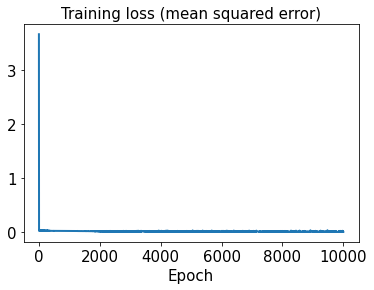

In [30]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

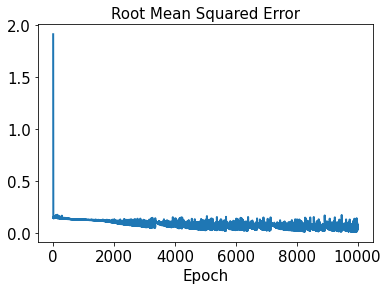

In [31]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [32]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [33]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [34]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.041784666


In [35]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.09002094


In [36]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [37]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

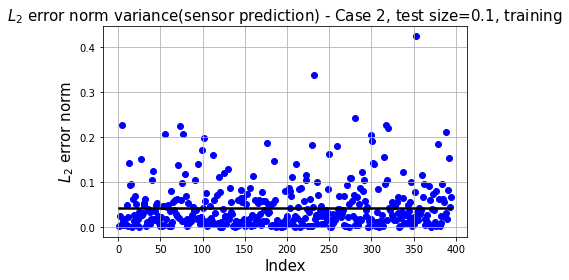

In [40]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

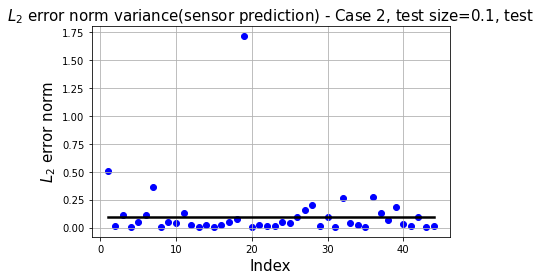

In [41]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()